In [1]:
import pandas as pd

df = pd.read_csv('data/conso_meteo.csv')

# Conversion de la colonne date et ajout d'un datetime complet avec heure si nécessaire
df['datetime'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['heure'], unit='h')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60600 entries, 0 to 60599
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   LOAD      60600 non-null  float64       
 1   w1        60600 non-null  int64         
 2   w2        60600 non-null  int64         
 3   w3        60600 non-null  int64         
 4   w4        60600 non-null  int64         
 5   w5        60600 non-null  int64         
 6   w6        60600 non-null  int64         
 7   w7        60600 non-null  int64         
 8   w8        60600 non-null  int64         
 9   w9        60600 non-null  int64         
 10  w10       60600 non-null  int64         
 11  w11       60600 non-null  int64         
 12  w12       60600 non-null  int64         
 13  w13       60600 non-null  int64         
 14  w14       60600 non-null  int64         
 15  w15       60600 non-null  int64         
 16  w16       60600 non-null  int64         
 17  w17       60

# Visualisation

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(15, 7))
plt.plot(df['datetime'], df['LOAD'], label='LOAD', alpha=0.7)
plt.plot(df['datetime'], df['LOAD'].rolling(window=168).mean(), label='Moyenne mobile (168h)', color='red')  # sur une semaine, par exemple
plt.xlabel('Temps')
plt.ylabel('LOAD')
plt.title('Évolution de LOAD dans le temps')
plt.legend()
plt.show()


In [ ]:
# Conversion de la colonne 'date' en datetime et ajout de la colonne 'heure'
df['datetime'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['heure'], unit='h')

# Définir 'datetime' comme index
df.set_index('datetime', inplace=True)

# On s'assure que l'index est trié par date
df = df.sort_index()

# Choisir une date de départ (par exemple, la première date disponible)
start_date = df.index.min()

# Définir les fenêtres temporelles avec DateOffset
one_month = start_date + pd.DateOffset(months=1)
three_months = start_date + pd.DateOffset(months=3)
six_months = start_date + pd.DateOffset(months=6)
one_year = start_date + pd.DateOffset(years=1)

# Filtrer les données pour chaque période
df_1m = df.loc[start_date:one_month]
df_3m = df.loc[start_date:three_months]
df_6m = df.loc[start_date:six_months]
df_1y = df.loc[start_date:one_year]

# Créer une figure avec 4 subplots (2 lignes x 2 colonnes)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()  # pour simplifier l'indexation

# Subplot 1 : 1 mois
axs[0].plot(df_1m.index, df_1m['LOAD'], color='blue')
axs[0].set_title("LOAD sur 1 mois")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("LOAD")

# Subplot 2 : 3 mois
axs[1].plot(df_3m.index, df_3m['LOAD'], color='green')
axs[1].set_title("LOAD sur 3 mois")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("LOAD")

# Subplot 3 : 6 mois
axs[2].plot(df_6m.index, df_6m['LOAD'], color='red')
axs[2].set_title("LOAD sur 6 mois")
axs[2].set_xlabel("Date")
axs[2].set_ylabel("LOAD")

# Subplot 4 : 1 an
axs[3].plot(df_1y.index, df_1y['LOAD'], color='purple')
axs[3].set_title("LOAD sur 1 an")
axs[3].set_xlabel("Date")
axs[3].set_ylabel("LOAD")

fig.tight_layout()  # Ajuste l'espacement entre les subplots
plt.show()

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.boxplot(x='heure', y='LOAD', data=df)
plt.xlabel('Heure de la journée')
plt.ylabel('LOAD')
plt.title('Distribution de LOAD selon l’heure')
plt.show()


In [ ]:
import numpy as np

# Sélectionner les colonnes d'intérêt
cols_interet = ['LOAD'] + [f'w{i}' for i in range(1, 26)]
corr_matrix = df[cols_interet].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation entre LOAD et les variables explicatives')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
# Utilisation d'un colormap cyclique, ici "twilight"
sc = plt.scatter(df['w1'], df['LOAD'], c=df['heure'], cmap='twilight', alpha=0.5)
plt.xlabel('w1')
plt.ylabel('LOAD')
plt.title('Relation entre w1 et LOAD')
plt.colorbar(sc, label='Heure')
plt.show()


In [ ]:
# Sélectionner toutes les colonnes dont le nom commence par "w"
wi_columns = [col for col in df.columns if col.startswith('w')]

plt.figure(figsize=(12, 6))
df[wi_columns].boxplot()
plt.title("Box Plot des colonnes wi")
plt.xticks(rotation=45)  # Pour une meilleure lisibilité des noms de colonnes
plt.ylabel("Valeurs")
plt.show()


In [ ]:
# Sélectionner toutes les colonnes dont le nom commence par "w"
wi_columns = [col for col in df.columns if col.startswith('w')]

# Créer un plot pour afficher l'évolution de toutes les colonnes wi dans le temps
plt.figure(figsize=(15, 7))
for col in wi_columns:
    plt.plot(df.index, df[col], label=col, alpha=0.5)

plt.title("Évolution des colonnes wi au cours du temps")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.show()

In [ ]:
# Sélectionner toutes les colonnes dont le nom commence par 'w'
wi_columns = [col for col in df.columns if col.startswith('w')]

# Résumer les données par semaine (moyenne)
df_resampled = df[wi_columns].resample('W').mean()

plt.figure(figsize=(15, 7))
for col in wi_columns:
    plt.plot(df_resampled.index, df_resampled[col], label=col, alpha=0.7)

plt.title("Évolution des colonnes wi au cours du temps (rééchantillonnage hebdomadaire)")
plt.xlabel("Temps")
plt.ylabel("Valeurs moyennes")
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Ajouter une colonne "year" à partir de l'index datetime
df['year'] = df.index.year

# Obtenir la liste des années disponibles et la trier
years = sorted(df['year'].unique())
initial_year = years[0]  # Année affichée par défaut

# Filtrer pour l'année initiale
df_initial = df[df['year'] == initial_year]

# Créer la figure et tracer la courbe pour l'année initiale
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_initial.index,
    y=df_initial['LOAD'],
    mode='lines',
    name=str(initial_year)
))

# Créer les boutons pour le menu déroulant (sélection de l'année)
year_buttons = []
for year in years:
    df_year = df[df['year'] == year]
    year_buttons.append(dict(
        label=str(year),
        method="update",
        args=[{"x": [df_year.index], "y": [df_year['LOAD']]},
              {"title": f"Load pour l'année {year}"}]
    ))

# Créer les boutons radio pour régler l'échelle de temps
# Nous modifions ici la propriété xaxis.dtick qui définit l'intervalle entre les ticks (en millisecondes)
time_scale_buttons = [
    dict(
        label="Quotidien",
        method="relayout",
        args=[{"xaxis.dtick": 86400000}]  # 1 jour = 86 400 000 ms
    ),
    dict(
        label="Hebdomadaire",
        method="relayout",
        args=[{"xaxis.dtick": 604800000}]  # 7 jours = 604 800 000 ms
    ),
    dict(
        label="Mensuel",
        method="relayout",
        args=[{"xaxis.dtick": 2592000000}]  # environ 30 jours = 2 592 000 000 ms
    ),
    dict(
        label="Annuel",
        method="relayout",
        args=[{"xaxis.dtick": 31536000000}]  # 365 jours = 31 536 000 000 ms
    )
]

# Mise à jour de la mise en page du graphique avec deux menus :
fig.update_layout(
    title=f"Load pour l'année {initial_year}",
    xaxis_title="Date",
    yaxis_title="LOAD",
    template="plotly_white",
    width=1200,    # Largeur du graphique
    height=800,    # Hauteur du graphique
    updatemenus=[
        # Menu déroulant pour sélectionner l'année
        dict(
            active=0,
            buttons=year_buttons,
            x=0.0,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
        # Boutons radio pour régler l'échelle temporelle
        dict(
            type="buttons",
            direction="right",
            showactive=True,
            buttons=time_scale_buttons,
            x=0.5,
            xanchor="center",
            y=1.15,
            yanchor="top"
        )
    ]
)

fig.show()


# Modélisation

## Réduction de dimension 

In [3]:
wi_columns = [col for col in df.columns if col.startswith('w')]
# Transposer la matrice afin que chaque ligne corresponde à un wi et chaque colonne à un instant
df_w = df[wi_columns].transpose()
df_w.index.name = 'wi'
print(df_w.shape) 

(25, 60600)


In [4]:
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # Encodeur : réduction progressive de la dimension
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 4096),
            nn.ReLU(),
            nn.Linear(4096, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Linear(256, latent_dim)
        )
        # Décodeur : reconstruction par étape inverse
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 1024),
            nn.ReLU(),
            nn.Linear(1024, 4096),
            nn.ReLU(),
            nn.Linear(4096, input_dim),
        )
        
    def forward(self, x):
        z = self.encoder(x)
        x_reconstructed = self.decoder(z)
        return x_reconstructed


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
import copy

# Normalisation des données
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df_w.to_numpy())

# Conversion en tenseur PyTorch
data_tensor = torch.tensor(data_normalized, dtype=torch.float32)

# Dimension d'entrée (nombre de features, ici par exemple 60600)
input_dim = data_tensor.shape[1]
print("Dimension d'entrée :", input_dim)

# Taille de l'espace latent (par exemple 50 dimensions)
latent_dim = 50         

# Paramètres d'entraînement
batch_size = 25
epochs = 100
learning_rate = 1e-3

# Définir le device (GPU si disponible)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Utilisation du device :", device)

# Création du Dataset et séparation train/validation
dataset = TensorDataset(data_tensor)
# Pour 25 observations, on prend 80% d'entraînement (20 obs) et 20% de validation (5 obs)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size],
                                            generator=torch.Generator().manual_seed(42))

# DataLoaders pour train et validation
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Initialisation du modèle, de la fonction de perte et de l'optimiseur
model = Autoencoder(input_dim, latent_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Configuration de l'early stopping
patience = 10
best_loss = float('inf')
counter = 0
best_model_state = None

# Boucle d'entraînement avec early stopping sur la loss de validation
for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    
    # Entraînement
    for batch in train_loader:
        x_batch = batch[0].to(device)
        optimizer.zero_grad()
        x_reconstructed = model(x_batch)
        loss = criterion(x_reconstructed, x_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x_batch.size(0)
    avg_train_loss = total_loss / len(train_dataset)

    # Validation
    model.eval()
    total_val_loss = 0.0
    with torch.no_grad():
        for batch in val_loader:
            x_val = batch[0].to(device)
            x_reconstructed = model(x_val)
            loss = criterion(x_reconstructed, x_val)
            total_val_loss += loss.item() * x_val.size(0)
    avg_val_loss = total_val_loss / len(val_dataset)
    
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    
    # Vérification early stopping
    if avg_val_loss < best_loss:
        best_loss = avg_val_loss
        best_model_state = copy.deepcopy(model.state_dict())
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping déclenché à l'epoch {epoch+1} : pas d'amélioration de la validation loss depuis {patience} epochs.")
            break

# Restauration du meilleur modèle (selon la loss de validation)
if best_model_state is not None:
    model.load_state_dict(best_model_state)

# Récupération de la représentation latente après entraînement
model.eval()
with torch.no_grad():
    latent_repr = model.encoder(data_tensor.to(device))
print("Shape de la représentation latente :", latent_repr.shape)


Dimension d'entrée : 60600
Utilisation du device : cuda
Epoch 1/100, Train Loss: 1.0062, Val Loss: 1.5504
Epoch 2/100, Train Loss: 1.5496, Val Loss: 1.0300
Epoch 3/100, Train Loss: 1.0314, Val Loss: 1.3088
Epoch 4/100, Train Loss: 0.9665, Val Loss: 0.9795
Epoch 5/100, Train Loss: 0.8027, Val Loss: 1.1240
Epoch 6/100, Train Loss: 1.3505, Val Loss: 0.8538
Epoch 7/100, Train Loss: 0.7749, Val Loss: 1.0527
Epoch 8/100, Train Loss: 0.7260, Val Loss: 0.9971
Epoch 9/100, Train Loss: 0.7055, Val Loss: 0.8524
Epoch 10/100, Train Loss: 0.6571, Val Loss: 0.7613
Epoch 11/100, Train Loss: 0.5902, Val Loss: 0.9633
Epoch 12/100, Train Loss: 0.6252, Val Loss: 0.7664
Epoch 13/100, Train Loss: 0.5444, Val Loss: 0.6903
Epoch 14/100, Train Loss: 0.5238, Val Loss: 0.6739
Epoch 15/100, Train Loss: 0.4704, Val Loss: 0.6726
Epoch 16/100, Train Loss: 0.4523, Val Loss: 0.6716
Epoch 17/100, Train Loss: 0.4307, Val Loss: 0.5484
Epoch 18/100, Train Loss: 0.3841, Val Loss: 0.5600
Epoch 19/100, Train Loss: 0.3752, V

MSE global sur l'ensemble des données: 0.3265


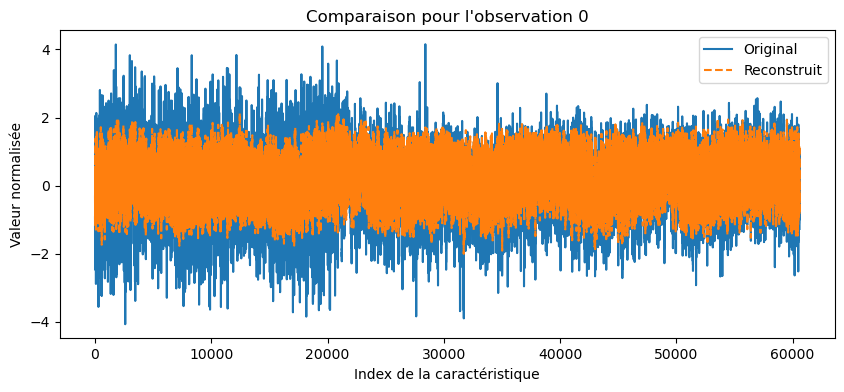

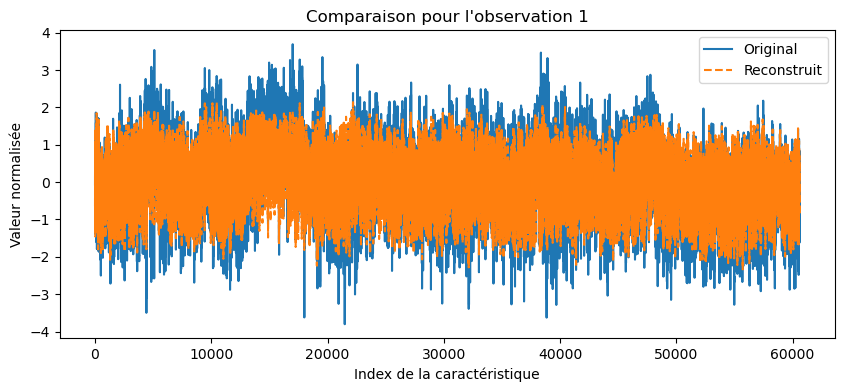

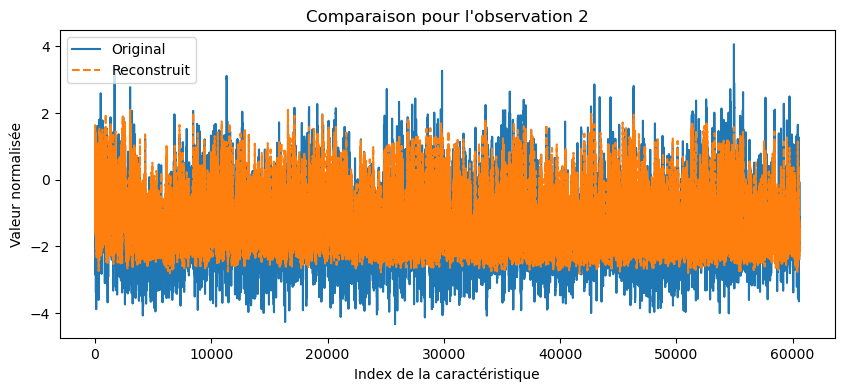

In [6]:
import matplotlib.pyplot as plt

# Reconstruction sur l'ensemble des données
with torch.no_grad():
    reconstructed_all = model(data_tensor.to(device))

# Calcul du MSE global sur l'ensemble des données
mse_global = criterion(reconstructed_all, data_tensor.to(device)).item()
print(f"MSE global sur l'ensemble des données: {mse_global:.4f}")

# On choisit par exemple 3 observations à comparer
n_examples = 3
data_tensor_cpu = data_tensor.cpu().numpy()
reconstructed_cpu = reconstructed_all.cpu().numpy()

for i in range(n_examples):
    plt.figure(figsize=(10, 4))
    plt.plot(data_tensor_cpu[i, :], label='Original')
    plt.plot(reconstructed_cpu[i, :], label='Reconstruit', linestyle='--')
    plt.title(f"Comparaison pour l'observation {i}")
    plt.xlabel("Index de la caractéristique")
    plt.ylabel("Valeur normalisée")
    plt.legend()
    plt.show()


## Nombre de clusters optimal pour les Wi

In [7]:
with torch.no_grad():
    latent_repr = model.encoder(data_tensor.to(device))

latent_array = latent_repr.cpu().numpy()
print("Shape de la représentation latente :", latent_array.shape)


Shape de la représentation latente : (25, 50)


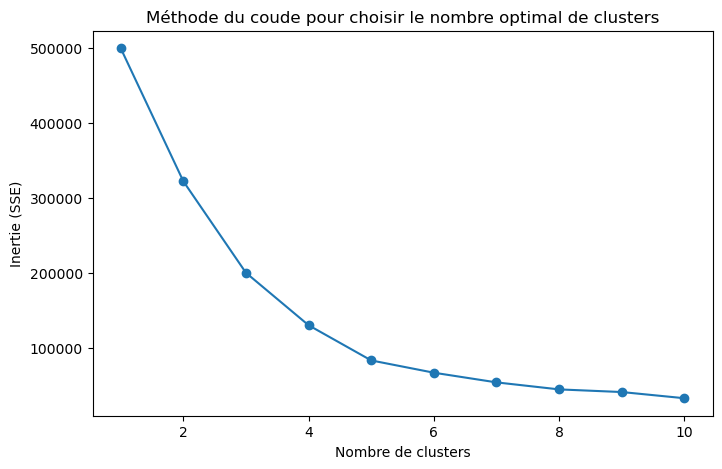

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []  # liste pour stocker l'inertie (SSE) pour chaque nombre de clusters
k_range = range(1, 11)  # tester de 1 à 10 clusters

# Appliquer KMeans sur les données issues de l'espace latent
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(latent_array)
    sse.append(kmeans.inertia_)  # inertia_ correspond à la somme des distances au carré dans chaque cluster

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie (SSE)")
plt.title("Méthode du coude pour choisir le nombre optimal de clusters")
plt.show()


In [9]:
# Choix du nombre de clusters, par exemple 3
optimal_clusters = 5
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans_final.fit_predict(latent_array)

# Affichage du résultat
print("Labels des clusters pour chaque observation :", cluster_labels)


Labels des clusters pour chaque observation : [3 4 2 3 0 4 0 0 2 0 3 3 3 1 3 0 3 1 3 0 4 0 0 3 4]


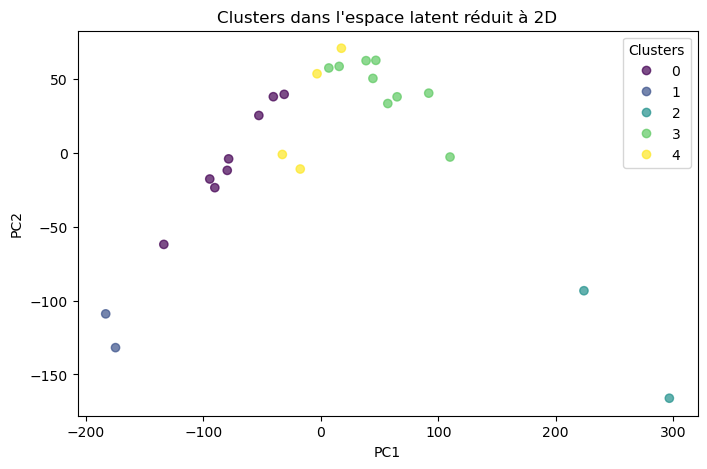

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
latent_2d = pca.fit_transform(latent_array)

plt.figure(figsize=(8,5))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Clusters dans l'espace latent réduit à 2D")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


In [11]:
# Choix du nombre de clusters, par exemple 5
optimal_clusters = 5
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans_final.fit_predict(latent_array)

print("Labels des clusters pour chaque observation :", cluster_labels)

representative_indices = []  # Indices dans latent_array qui représentent chaque cluster

for k in range(optimal_clusters):
    # Récupérer les indices des observations appartenant au cluster k
    cluster_indices = np.where(cluster_labels == k)[0]
    # Extraire les données de ce cluster
    cluster_data = latent_array[cluster_indices]
    # Accéder au centroïde du cluster avec kmeans_final.cluster_centers_
    centroid = kmeans_final.cluster_centers_[k]
    # Calculer la distance euclidienne de chaque point au centroïde
    distances = np.linalg.norm(cluster_data - centroid, axis=1)
    # Trouver l'indice (au sein du cluster) du point le plus proche du centroïde
    min_idx_in_cluster = np.argmin(distances)
    # Convertir en indice par rapport à l'ensemble des observations
    representative_idx = cluster_indices[min_idx_in_cluster]
    representative_indices.append(representative_idx)

print("Indices des wi représentatifs par cluster :", representative_indices)

# Facultatif : Afficher les wi sélectionnés à partir de vos données originales.
selected_wi = df_w.iloc[representative_indices]
print("wi sélectionnés pour chaque cluster :")
print(selected_wi)


Labels des clusters pour chaque observation : [3 4 2 3 0 4 0 0 2 0 3 3 3 1 3 0 3 1 3 0 4 0 0 3 4]
Indices des wi représentatifs par cluster : [np.int64(9), np.int64(13), np.int64(2), np.int64(11), np.int64(5)]
wi sélectionnés pour chaque cluster :
     0      1      2      3      4      5      6      7      8      9      \
wi                                                                          
w10     42     41     40     39     38     37     37     36     35     45   
w14     53     53     52     52     51     50     50     51     54     55   
w3      40     38     37     37     37     36     37     37     38     43   
w12     48     48     41     46     46     43     43     45     48     54   
w6      46     45     45     48     49     48     44     48     51     55   

     ...  60590  60591  60592  60593  60594  60595  60596  60597  60598  60599  
wi   ...                                                                        
w10  ...     54     53     51     49     46     43

## Prédiction

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

In [3]:
# -------------------------------
# 1. Chargement et préparation des données
# -------------------------------

# Colonnes sélectionnées issues du clustering
colonnes_w = ['w9', 'w13', 'w2', 'w11', 'w5']

# Conversion de la colonne datetime et tri chronologique
df['datetime'] = pd.to_datetime(df['datetime'])
df.sort_values('datetime', inplace=True)

# Filtrage pour ne conserver que les deux dernières années
date_max = df['datetime'].max()
date_min = date_max - pd.DateOffset(years=2)
df = df[df['datetime'] >= date_min].copy()

# Création des colonnes pour les lags :
#   - LOAD_J1 : load de la veille à la même heure
#   - LOAD_J7 : load à la même heure il y a 7 jours
df['LOAD_J1'] = df['LOAD'].shift(24)
df['LOAD_J7'] = df['LOAD'].shift(7*24)

# On souhaite utiliser les colonnes_w ET les indicateurs lag comme features
features = colonnes_w + ['LOAD_J1', 'LOAD_J7']
target = 'LOAD'

# Suppression des lignes avec des valeurs manquantes dues aux décalages
df = df.dropna()

In [4]:
# -------------------------------
# 2. Normalisation
# -------------------------------

scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Normalisation des features et de la cible
X_vals = scaler_X.fit_transform(df[features].values)
y_vals = scaler_y.fit_transform(df[target].values.reshape(-1, 1))

# Reconstruction d'un DataFrame avec les données normalisées
df_scaled = pd.DataFrame(X_vals, index=df.index, columns=features)
df_scaled[target] = y_vals

# Affichage des tailles
print("Taille des features après normalisation :", X_vals.shape)
print("Taille de la cible après normalisation :", y_vals.shape)

Taille des features après normalisation : (17353, 7)
Taille de la cible après normalisation : (17353, 1)


In [5]:
# -------------------------------
# 3. Création des séquences
# -------------------------------

# Horizon de prédiction : 24 heures
horizon = 24

def create_sequences(data, features, target, horizon):
    """
    Génère des séquences de longueur 'horizon'.
    Pour chaque séquence d'entrée (features), la cible associée est 
    la séquence de 'LOAD' sur la même fenêtre.
    """
    X_seq, y_seq = [], []
    for i in range(len(data) - horizon):
        X_seq.append(data[features].iloc[i:i+horizon].values)  # dimension (horizon, nb_features)
        y_seq.append(data[target].iloc[i:i+horizon].values)      # dimension (horizon,)
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(df_scaled, features, target, horizon)

print("Forme des séquences d'entrée :", X_seq.shape)  # (nb_samples, horizon, nb_features)
print("Forme des cibles :", y_seq.shape)                # (nb_samples, horizon)

Forme des séquences d'entrée : (17329, 24, 7)
Forme des cibles : (17329, 24)


In [6]:
# -------------------------------
# 4. Préparation des DataLoaders PyTorch
# -------------------------------

# Définition des tailles pour chaque ensemble
# Ici, on considère que 720 échantillons correspondent à environ 30 jours
test_size = 720      # Dernier mois pour le test
val_size = 720       # Mois précédent pour la validation
n_total = X_seq.shape[0]
train_size = n_total - (test_size + val_size)  # Reste pour l'entraînement

# Conversion en tenseurs
X_train = torch.tensor(X_seq[:train_size], dtype=torch.float32)
y_train = torch.tensor(y_seq[:train_size], dtype=torch.float32)

X_val = torch.tensor(X_seq[train_size:train_size + val_size], dtype=torch.float32)
y_val = torch.tensor(y_seq[train_size:train_size + val_size], dtype=torch.float32)

X_test = torch.tensor(X_seq[train_size + val_size:], dtype=torch.float32)
y_test = torch.tensor(y_seq[train_size + val_size:], dtype=torch.float32)

# Création des datasets
train_dataset = TensorDataset(X_train, y_train)
val_dataset   = TensorDataset(X_val, y_val)
test_dataset  = TensorDataset(X_test, y_test)

# Définition du batch size
batch_size = 64

# Création des DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#### LSTM

In [7]:
# -------------------------------
# 5. Définition du modèle LSTM en PyTorch
# -------------------------------

class LSTMPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1, dropout=0.2):
        super(LSTMPredictor, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.dropout = nn.Dropout(dropout)
        # Prédiction de 'output_size' valeurs (ici, 24 heures)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # x de dimension : (batch_size, seq_len, input_size)
        out, (hn, cn) = self.lstm(x)
        # hn de dimension : (num_layers, batch_size, hidden_size)
        last_hidden = hn[-1]  # Dernier état caché de la dernière couche
        last_hidden = self.dropout(last_hidden)
        out = self.fc(last_hidden)  # Sortie : (batch_size, output_size)
        return out

# Paramètres du modèle :
input_size  = len(features)  # ici, 7 features en entrée (5 colonnes_w + 2 lags)
hidden_size = 50
num_layers  = 3
output_size = horizon       # 24 prédictions, une par heure

# Utilisation du GPU si disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMPredictor(input_size, hidden_size, output_size, num_layers, dropout=0.2).to(device)
print(model)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

LSTMPredictor(
  (lstm): LSTM(7, 50, num_layers=3, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=50, out_features=24, bias=True)
)


In [8]:
# -------------------------------
# 6. Entraînement du modèle
# -------------------------------

num_epochs = 50
epoch_train_losses = []  # Pour stocker la MSE moyenne par époque
epoch_val_losses = []    # Pour la validation

for epoch in range(num_epochs):
    model.train()
    batch_losses = []  # Pertes pour chaque batch de l'époque
    
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        optimizer.zero_grad()
        pred = model(X_batch)  # Prédiction : (batch, horizon)
        loss = criterion(pred, y_batch)
        loss.backward()
        optimizer.step()
        
        batch_losses.append(loss.item())
    
    # Moyenne sur tous les batches de l'époque
    avg_train_loss = np.mean(batch_losses)
    epoch_train_losses.append(avg_train_loss)
    
    # Évaluation sur le jeu de validation à la fin de l'époque
    model.eval()
    batch_val_losses = []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            pred = model(X_batch)
            loss = criterion(pred, y_batch)
            batch_val_losses.append(loss.item())
    avg_val_loss = np.mean(batch_val_losses)
    epoch_val_losses.append(avg_val_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs} - Training MSE: {avg_train_loss:.5f} - Validation MSE: {avg_val_loss:.5f}")


Epoch 1/50 - Training MSE: 0.32899 - Validation MSE: 0.07424
Epoch 2/50 - Training MSE: 0.12543 - Validation MSE: 0.07071
Epoch 3/50 - Training MSE: 0.11562 - Validation MSE: 0.06604
Epoch 4/50 - Training MSE: 0.11016 - Validation MSE: 0.05658
Epoch 5/50 - Training MSE: 0.09352 - Validation MSE: 0.02823
Epoch 6/50 - Training MSE: 0.07236 - Validation MSE: 0.02493
Epoch 7/50 - Training MSE: 0.06650 - Validation MSE: 0.02778
Epoch 8/50 - Training MSE: 0.06314 - Validation MSE: 0.02545
Epoch 9/50 - Training MSE: 0.06067 - Validation MSE: 0.02637
Epoch 10/50 - Training MSE: 0.05915 - Validation MSE: 0.02692
Epoch 11/50 - Training MSE: 0.05679 - Validation MSE: 0.02667
Epoch 12/50 - Training MSE: 0.05564 - Validation MSE: 0.02344
Epoch 13/50 - Training MSE: 0.05824 - Validation MSE: 0.02123
Epoch 14/50 - Training MSE: 0.05581 - Validation MSE: 0.01997
Epoch 15/50 - Training MSE: 0.05327 - Validation MSE: 0.02176
Epoch 16/50 - Training MSE: 0.05137 - Validation MSE: 0.01991
Epoch 17/50 - Tra

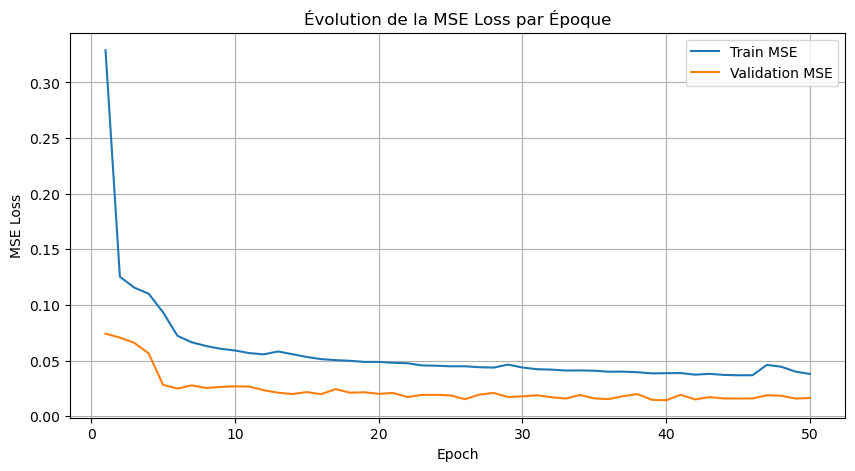

In [9]:
import matplotlib.pyplot as plt

# -------------------------------
# Visualisation des courbes (Loss et MAE)
# -------------------------------

# Courbe de la loss (MSE)
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), epoch_train_losses, label='Train MSE')
plt.plot(range(1, num_epochs+1), epoch_val_losses, label='Validation MSE')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Évolution de la MSE Loss par Époque")
plt.legend()
plt.grid(True)
plt.show()

#### GRU

GRUPredictor(
  (gru): GRU(7, 50, num_layers=3, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=50, out_features=24, bias=True)
)
Epoch 1/50 - Training MSE: 0.31886 - Validation MSE: 0.06841
Epoch 2/50 - Training MSE: 0.12331 - Validation MSE: 0.06633
Epoch 3/50 - Training MSE: 0.10907 - Validation MSE: 0.05733
Epoch 4/50 - Training MSE: 0.08257 - Validation MSE: 0.02395
Epoch 5/50 - Training MSE: 0.06856 - Validation MSE: 0.02544
Epoch 6/50 - Training MSE: 0.06526 - Validation MSE: 0.02463
Epoch 7/50 - Training MSE: 0.06379 - Validation MSE: 0.02039
Epoch 8/50 - Training MSE: 0.06063 - Validation MSE: 0.02902
Epoch 9/50 - Training MSE: 0.05938 - Validation MSE: 0.02512
Epoch 10/50 - Training MSE: 0.05883 - Validation MSE: 0.02301
Epoch 11/50 - Training MSE: 0.05774 - Validation MSE: 0.02061
Epoch 12/50 - Training MSE: 0.05639 - Validation MSE: 0.02294
Epoch 13/50 - Training MSE: 0.05442 - Validation MSE: 0.02518
Epoch 14/50 - Training MSE: 0.053

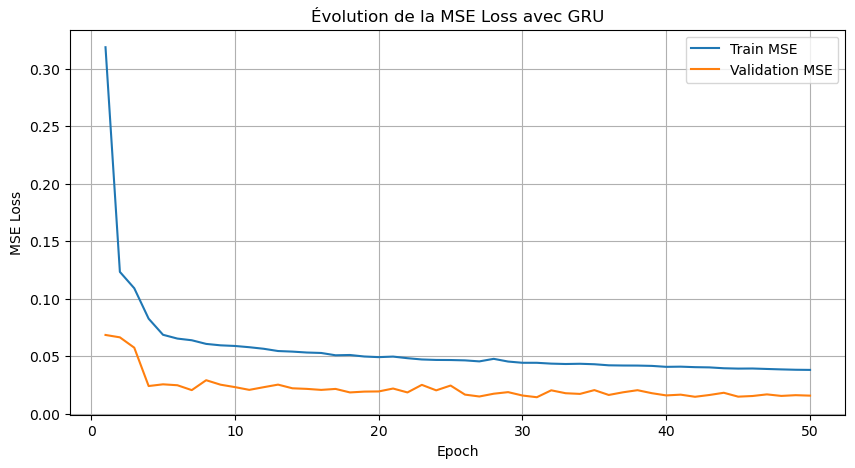

In [10]:
import torch
import torch.nn as nn

class GRUPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1, dropout=0.2):
        super(GRUPredictor, self).__init__()
        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.dropout = nn.Dropout(dropout)
        # Prédiction de 'output_size' valeurs (par exemple, 24 heures)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # x de dimension : (batch_size, seq_len, input_size)
        out, h_n = self.gru(x)
        # h_n de dimension : (num_layers, batch_size, hidden_size)
        last_hidden = h_n[-1]  # Dernier état caché de la dernière couche
        last_hidden = self.dropout(last_hidden)
        out = self.fc(last_hidden)  # Sortie : (batch_size, output_size)
        return out

# Paramètres du modèle
input_size  = len(features)  # par exemple, 7 features en entrée
hidden_size = 50
num_layers  = 3
output_size = horizon       # par exemple, 24 prédictions (une par heure)

# Utilisation du GPU si disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GRUPredictor(input_size, hidden_size, output_size, num_layers, dropout=0.2).to(device)
print(model)

# Critère et optimiseur restent identiques (par exemple, on suit la MSE)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

import numpy as np

num_epochs = 50
epoch_train_losses = []  # pour stocker la MSE moyenne par époque
epoch_val_losses = []

for epoch in range(num_epochs):
    # Phase d'entraînement
    model.train()
    batch_losses = []
    
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        optimizer.zero_grad()
        pred = model(X_batch)  # prédiction : (batch_size, horizon)
        loss = criterion(pred, y_batch)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())
    
    avg_train_loss = np.mean(batch_losses)
    epoch_train_losses.append(avg_train_loss)
    
    # Évaluation sur le jeu de validation à la fin de l'époque
    model.eval()
    batch_val_losses = []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            pred = model(X_batch)
            loss = criterion(pred, y_batch)
            batch_val_losses.append(loss.item())
    avg_val_loss = np.mean(batch_val_losses)
    epoch_val_losses.append(avg_val_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs} - Training MSE: {avg_train_loss:.5f} - Validation MSE: {avg_val_loss:.5f}")

# Évaluation finale sur le jeu de test (facultatif)
model.eval()
test_losses = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        pred = model(X_batch)
        loss = criterion(pred, y_batch)
        test_losses.append(loss.item())
avg_test_loss = np.mean(test_losses)
print(f"Final Test MSE: {avg_test_loss:.5f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), epoch_train_losses, label='Train MSE')
plt.plot(range(1, num_epochs+1), epoch_val_losses, label='Validation MSE')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Évolution de la MSE Loss avec GRU")
plt.legend()
plt.grid(True)
plt.show()


#### Transformers

In [7]:
import math
import torch
import torch.nn as nn

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        
        # Création d'un tensor de taille (max_len, d_model)
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        # Calcul des termes d'échelle
        div_term = torch.exp(torch.arange(0, d_model, 2, dtype=torch.float) * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        # On ajoute une dimension batch (1, max_len, d_model)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x de forme (batch, seq_len, d_model)
        x = x + self.pe[:, :x.size(1)]
        return self.dropout(x)

class TransformerPredictor(nn.Module):
    def __init__(self, input_size, model_dim, num_heads, num_layers, output_size, dropout=0.1):
        super(TransformerPredictor, self).__init__()
        # Projection des features d'entrée dans l'espace de dimension model_dim
        self.input_linear = nn.Linear(input_size, model_dim)
        # Ajout du positional encoding
        self.positional_encoding = PositionalEncoding(model_dim, dropout=dropout)
        # Création de l'encodeur Transformer
        encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        # Couche de sortie : projection de la représentation vers output_size
        self.fc = nn.Linear(model_dim, output_size)
        
    def forward(self, x):
        # x de dimension (batch, seq_len, input_size)
        x = self.input_linear(x)       # (batch, seq_len, model_dim)
        x = self.positional_encoding(x)  # (batch, seq_len, model_dim)
        # Les Transformers de PyTorch attendent un input de dimension (seq_len, batch, model_dim)
        x = x.transpose(0, 1)  # (seq_len, batch, model_dim)
        encoded = self.transformer_encoder(x)  # (seq_len, batch, model_dim)
        # On récupère la représentation associée au dernier pas de temps.
        # Une autre stratégie possible est d'appliquer un mean pooling sur la séquence.
        out = encoded[-1]  # (batch, model_dim)
        out = self.fc(out)  # (batch, output_size)
        return out


In [8]:
# Paramètres du modèle
input_size  = len(features)  # par exemple, 7 features en entrée
model_dim   = 64            # dimension d'embedding pour le Transformer
num_heads   = 4             # nombre de têtes pour l'attention multi-head
num_layers  = 3             # nombre de couches de l'encodeur Transformer
output_size = horizon       # par exemple, 24 prédictions (une par heure)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TransformerPredictor(input_size, model_dim, num_heads, num_layers, output_size, dropout=0.1).to(device)
print(model)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


/opt/conda/lib/python3.12/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


TransformerPredictor(
  (input_linear): Linear(in_features=7, out_features=64, bias=True)
  (positional_encoding): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (fc): Linear(in_features=64, out_features=24, bias=True)
)


Epoch 1/50 - Training MSE: 0.24195 - Validation MSE: 0.06166
Epoch 2/50 - Training MSE: 0.09179 - Validation MSE: 0.03016
Epoch 3/50 - Training MSE: 0.06642 - Validation MSE: 0.03630
Pas d'amélioration. Early stop counter: 1/5
Epoch 4/50 - Training MSE: 0.05952 - Validation MSE: 0.03219
Pas d'amélioration. Early stop counter: 2/5
Epoch 5/50 - Training MSE: 0.05294 - Validation MSE: 0.02442
Epoch 6/50 - Training MSE: 0.04978 - Validation MSE: 0.02121
Epoch 7/50 - Training MSE: 0.04964 - Validation MSE: 0.03010
Pas d'amélioration. Early stop counter: 1/5
Epoch 8/50 - Training MSE: 0.04683 - Validation MSE: 0.02148
Pas d'amélioration. Early stop counter: 2/5
Epoch 9/50 - Training MSE: 0.04285 - Validation MSE: 0.01726
Epoch 10/50 - Training MSE: 0.04207 - Validation MSE: 0.02174
Pas d'amélioration. Early stop counter: 1/5
Epoch 11/50 - Training MSE: 0.04059 - Validation MSE: 0.02448
Pas d'amélioration. Early stop counter: 2/5
Epoch 12/50 - Training MSE: 0.03712 - Validation MSE: 0.01565
E

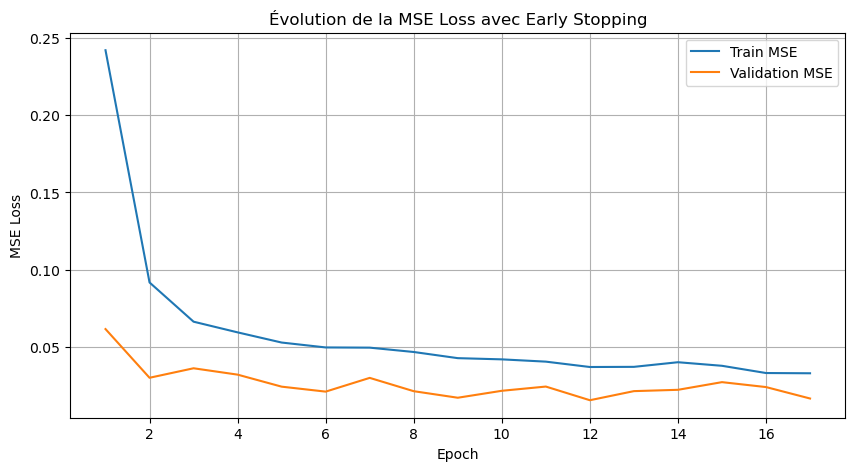

In [9]:
import numpy as np
import matplotlib.pyplot as plt

num_epochs = 50
patience = 5  # Nombre d'epochs à attendre sans amélioration avant d'arrêter
best_val_loss = np.inf
early_stop_counter = 0

epoch_train_losses = []
epoch_val_losses = []

# Sauvegarde des meilleurs poids
best_model_wts = None

for epoch in range(num_epochs):
    model.train()
    batch_losses = []
    
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        optimizer.zero_grad()
        pred = model(X_batch)
        loss = criterion(pred, y_batch)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())
    
    avg_train_loss = np.mean(batch_losses)
    epoch_train_losses.append(avg_train_loss)
    
    model.eval()
    batch_val_losses = []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            pred = model(X_batch)
            loss = criterion(pred, y_batch)
            batch_val_losses.append(loss.item())
    avg_val_loss = np.mean(batch_val_losses)
    epoch_val_losses.append(avg_val_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs} - Training MSE: {avg_train_loss:.5f} - Validation MSE: {avg_val_loss:.5f}")
    
    # Early stopping : si la perte de validation s'améliore, on sauvegarde le modèle et on réinitialise le compteur
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model_wts = model.state_dict()  # Sauvegarde des meilleurs poids
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        print(f"Pas d'amélioration. Early stop counter: {early_stop_counter}/{patience}")
    
    if early_stop_counter >= patience:
        print("Early stopping déclenché!")
        break

# Optionnel : restauration des meilleurs poids sauvegardés
if best_model_wts is not None:
    model.load_state_dict(best_model_wts)

# Évaluation finale sur le jeu de test
model.eval()
test_losses = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        pred = model(X_batch)
        loss = criterion(pred, y_batch)
        test_losses.append(loss.item())
avg_test_loss = np.mean(test_losses)
print(f"Final Test MSE: {avg_test_loss:.5f}")

# Visualisation des courbes
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(epoch_train_losses)+1), epoch_train_losses, label='Train MSE')
plt.plot(range(1, len(epoch_val_losses)+1), epoch_val_losses, label='Validation MSE')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Évolution de la MSE Loss avec Early Stopping")
plt.legend()
plt.grid(True)
plt.show()


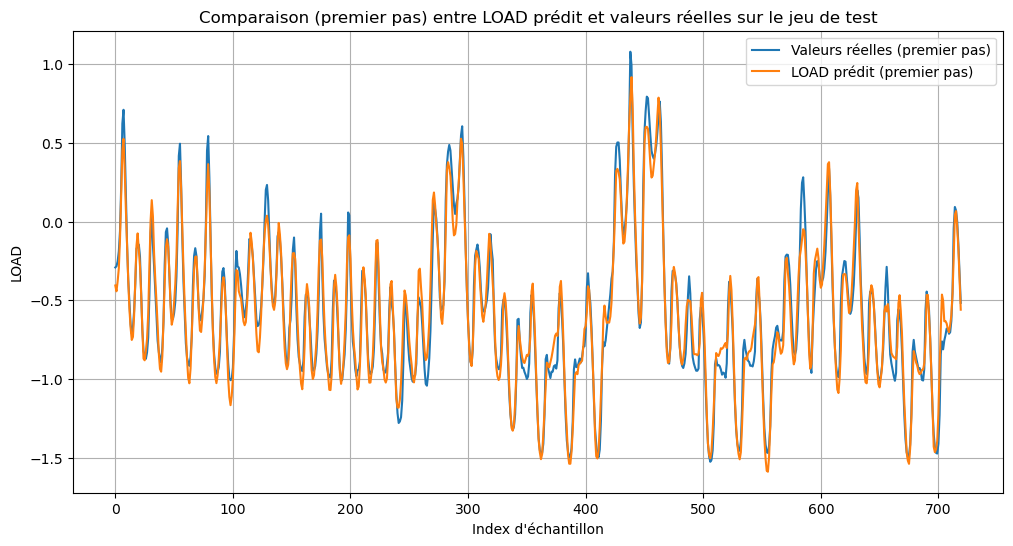

In [10]:
# ------------------------------
# Visualisation du LOAD prédit vs valeurs réelles sur le jeu de test
# ------------------------------

# Récupération des prédictions et des valeurs réelles pour l'ensemble de test
predictions_list = []
true_values_list = []
model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        pred = model(X_batch)
        predictions_list.append(pred.cpu().numpy())
        true_values_list.append(y_batch.cpu().numpy())

# On concatène les résultats pour obtenir un vecteur d'échantillons continus
predictions = np.concatenate(predictions_list, axis=0)
y_true = np.concatenate(true_values_list, axis=0)

# utilisez l'indice correspondant. Exemple pour comparer la première prédiction de chaque échantillon :
plt.figure(figsize=(12, 6))
plt.plot(y_true[:, 0], label='Valeurs réelles (premier pas)')
plt.plot(predictions[:, 0], label='LOAD prédit (premier pas)')
plt.xlabel("Index d'échantillon")
plt.ylabel("LOAD")
plt.title("Comparaison (premier pas) entre LOAD prédit et valeurs réelles sur le jeu de test")
plt.legend()
plt.grid(True)
plt.show()

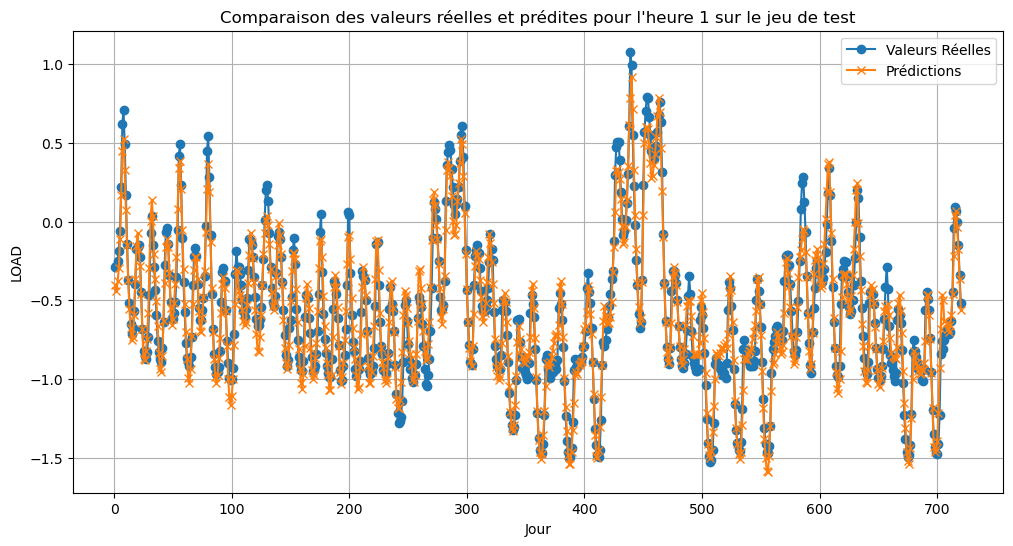

In [11]:
# Choix de l'heure que l'on souhaite afficher pour chaque jour :
# Ici on choisit la première heure (index 0)
selected_hour = 0

# Extraction des valeurs pour l'heure sélectionnée pour chaque jour
daily_predictions = predictions[:, selected_hour]  # forme : (n_days,)
daily_true = y_true[:, selected_hour]              # forme : (n_days,)

n_days = daily_predictions.shape[0]

# Affichage sur un même graphique
plt.figure(figsize=(12, 6))
plt.plot(range(1, n_days + 1), daily_true, marker='o', label='Valeurs Réelles')
plt.plot(range(1, n_days + 1), daily_predictions, marker='x', label='Prédictions')
plt.xlabel("Jour")
plt.ylabel("LOAD")
plt.title(f"Comparaison des valeurs réelles et prédites pour l'heure {selected_hour + 1} sur le jeu de test")
plt.legend()
plt.grid(True)
plt.show()

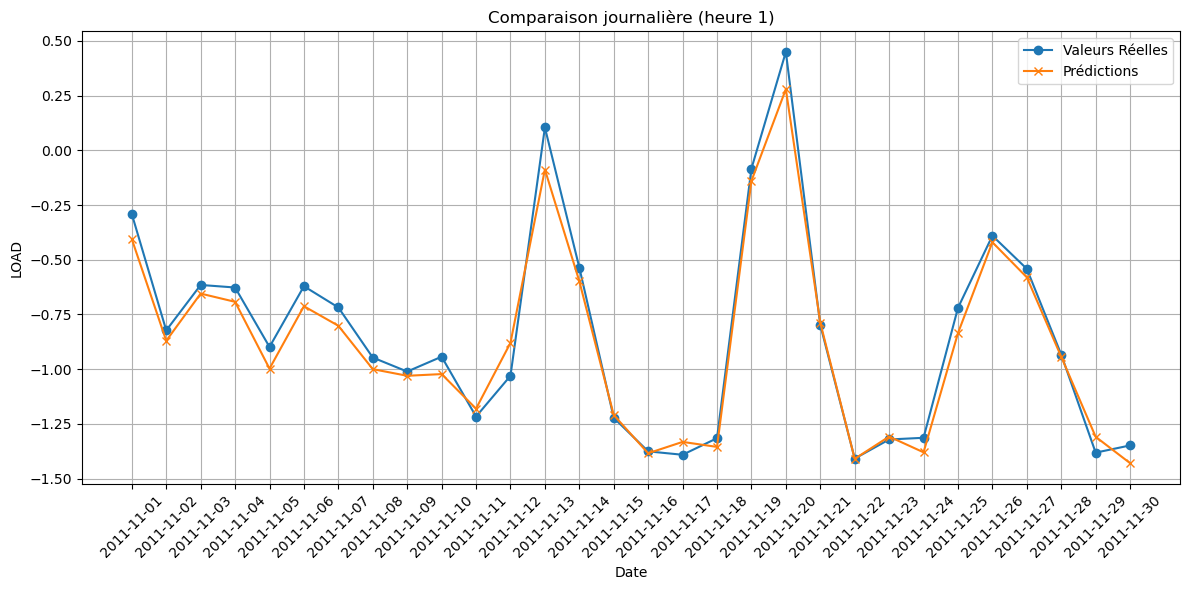

In [ ]:
# Nombre de prédictions par séquence (horizon)
n_hours_predicted = 24

# On s'attend à avoir 17 280 éléments (ce qui correspond à 720 séquences de 24 valeurs)
total_values = predictions.size  # devrait être 17280
n_sequences = total_values // n_hours_predicted  # doit donner 720

# Remodeler en (720, 24)
predictions_reshaped = predictions.reshape(n_sequences, n_hours_predicted)
y_true_reshaped = y_true.reshape(n_sequences, n_hours_predicted)

# ------------------------------
# Sélection d'une prédiction par jour
# ------------------------------
# Si votre test set couvre 720 séquences et que vous considérez ces 720 séquences comme couvrant 30 jours non chevauchants,
# alors le pas pour extraire une séquence par jour est :
pas = n_sequences // 30  # 720 // 30 = 24

# Par exemple, pour la première prédiction de la fenêtre (selected_hour = 0)
selected_hour = 0
daily_predictions = predictions_reshaped[::pas, selected_hour]  # devrait avoir 30 valeurs
daily_true = y_true_reshaped[::pas, selected_hour]              # 30 valeurs réelles

# ------------------------------
# Extraction des dates à partir du DataFrame (ensemble de test)
# ------------------------------
test_df = df.iloc[-720:]  # les 720 dernières lignes du DataFrame
# On regroupe par date via la colonne datetime pour obtenir environ 30 dates uniques
test_dates = test_df.groupby(test_df['datetime'].dt.date).first().index.astype(str).to_numpy()

# Vérification du nombre de dates
if len(test_dates) != len(daily_predictions):
    print(f"Avertissement : il y a {len(test_dates)} dates mais {len(daily_predictions)} valeurs. Ajustez votre regroupement.")

# ------------------------------
# Affichage du graphique
# ------------------------------
plt.figure(figsize=(12, 6))
plt.plot(test_dates, daily_true, marker='o', label='Valeurs Réelles')
plt.plot(test_dates, daily_predictions, marker='x', label='Prédictions')
plt.xlabel("Date")
plt.ylabel("LOAD")
plt.title(f"Comparaison journalière (heure {selected_hour+1})")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
